In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/sample-submission.csv
/kaggle/input/breast-cancer/train.csv
/kaggle/input/breast-cancer/test.csv


In [2]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Train=pd.read_csv("/kaggle/input/breast-cancer/train.csv")
Test=pd.read_csv("/kaggle/input/breast-cancer/test.csv")

In [4]:
Train.head()

,Id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,1,5,1,1,1,2,1,3,1,1,2
1,2,5,4,4,5,7,10,3,2,1,2
2,3,3,1,1,1,2,2,3,1,1,2
3,4,6,8,8,1,3,4,3,7,1,2
4,5,4,1,1,3,2,1,3,1,1,2


<AxesSubplot:>

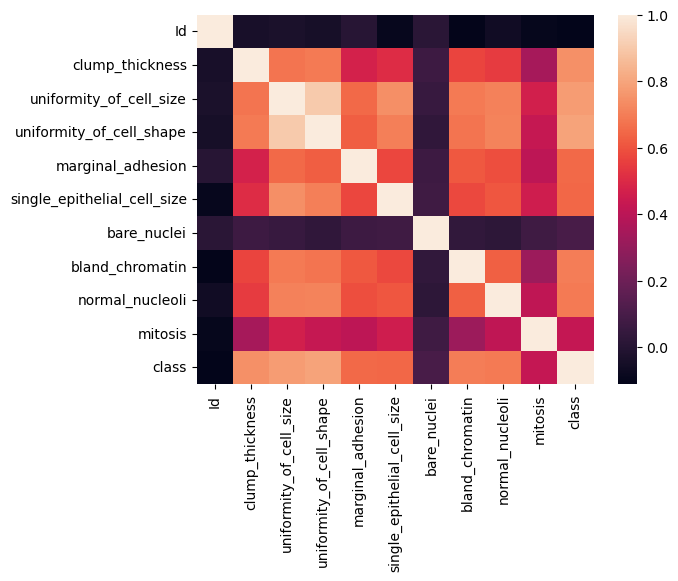

In [5]:
#correlation graphs
Data= Train.corr()
sns.heatmap(Data)

In [6]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Id                           468 non-null    int64
 1   clump_thickness              468 non-null    int64
 2   uniformity_of_cell_size      468 non-null    int64
 3   uniformity_of_cell_shape     468 non-null    int64
 4   marginal_adhesion            468 non-null    int64
 5   single_epithelial_cell_size  468 non-null    int64
 6   bare_nuclei                  468 non-null    int64
 7   bland_chromatin              468 non-null    int64
 8   normal_nucleoli              468 non-null    int64
 9   mitosis                      468 non-null    int64
 10  class                        468 non-null    int64
dtypes: int64(11)
memory usage: 40.3 KB


In [7]:
Test.head()

,Id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,1,4,1,1,1,2,1,1,1,1
1,2,1,1,2,1,2,1,2,1,1
2,3,3,1,1,1,1,1,2,1,1
3,4,6,1,1,3,2,1,1,1,1
4,5,6,1,1,1,1,1,1,1,1


In [8]:
Train.drop("Id", axis=1, inplace=True)

In [9]:
print("shape of train data: ", Train.shape)
print("\nshape of test data: ", Test.shape)

shape of train data:  (468, 10)

shape of test data:  (101, 10)


In [10]:
Train["class"].unique()

array([2, 4])

In [11]:
Data= np.array(Train.iloc[:,:9])
Labels=np.array(Train["class"])


In [12]:
test_size =25
#splitting data into train and test data

X_train, X_test, y_train, y_test = train_test_split(Data,Labels, test_size = test_size, random_state = 10)


In [13]:
#using cross validation score to calculateoptimal value of K

klist = []
K_scores = []
for k in range(1,30):
   klist.append(k)
   KNN = KNeighborsClassifier(n_neighbors = k)
   scores = cross_val_score(KNN,X_train,y_train,cv=10, scoring = 'accuracy')
   K_scores.append(scores.mean())

In [14]:
print(K_scores)

[0.939141414141414, 0.9367171717171718, 0.9547979797979795, 0.9479797979797979, 0.9615656565656565, 0.9593434343434343, 0.957070707070707, 0.9548484848484848, 0.9616161616161616, 0.9503535353535352, 0.9526262626262625, 0.9526262626262625, 0.957121212121212, 0.957121212121212, 0.957121212121212, 0.9548989898989898, 0.957121212121212, 0.9526262626262625, 0.9548989898989898, 0.9526262626262625, 0.9548989898989898, 0.9526262626262625, 0.9548989898989898, 0.9526767676767676, 0.9526767676767676, 0.9526767676767676, 0.9526767676767676, 0.9481818181818182, 0.9481818181818182]


In [15]:
# calculating MSE
MSE=[1-x for x in K_scores]

Text(0, 0.5, 'Mean Error')

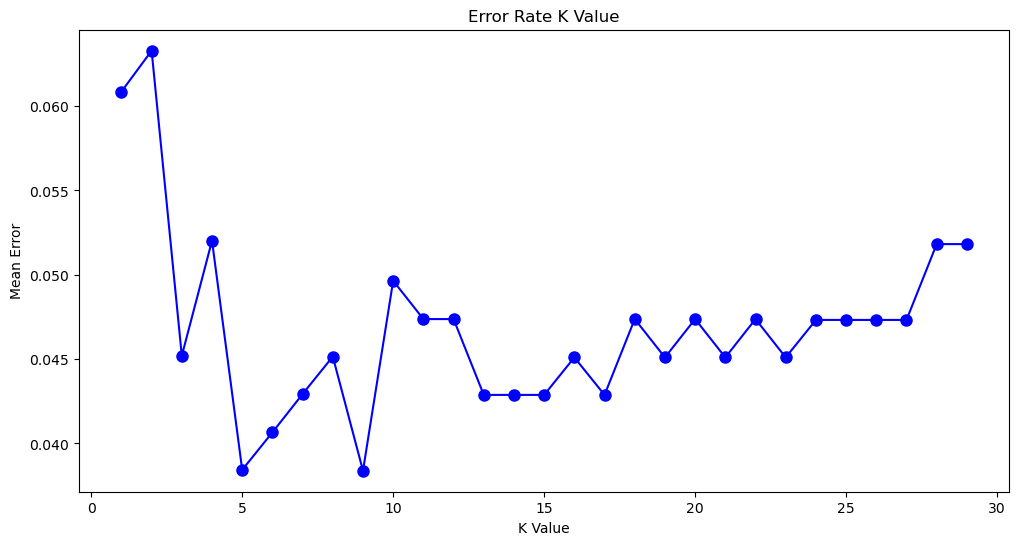

In [16]:
#plotting graph to visualize error rate and k values
plt.figure(figsize=(12, 6))
plt.plot(range(1,30), MSE, color='blue', linestyle="solid", marker='o',markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [17]:
#value of k for which mse is minimum is optimal
Optimal_K = klist[MSE.index(min(MSE))]

print("The optimal value of K (neighbors) is ",Optimal_K)

The optimal value of K (neighbors) is  9


In [18]:
KNN = KNeighborsClassifier(n_neighbors = Optimal_K)

KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#predicting test data
y_predict= KNN.predict(X_test)

accuracy=accuracy_score(y_test,y_predict)

print(f'Accuracy Score of the Model: {accuracy}')

Accuracy Score of the Model: 0.92


In [20]:
print("\nClassification Report:\n\n" ,classification_report(y_test,y_predict))


Classification Report:

               precision    recall  f1-score   support

           2       0.94      0.94      0.94        17
           4       0.88      0.88      0.88         8

    accuracy                           0.92        25
   macro avg       0.91      0.91      0.91        25
weighted avg       0.92      0.92      0.92        25



In [21]:
# converting Test dataframe into numpy array
test=np.array(Test.iloc[:, 1:])

In [22]:
test_predict= KNN.predict(test)

In [23]:
# sample= pd.read_csv("/kaggle/input/breast-cancer/sample-submission.csv")

In [24]:
# sample.head()

In [25]:
test_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4])

In [26]:
Predictions= pd.DataFrame(columns=["Id","class"])

In [27]:
Predictions['Id']= Test['Id']
Predictions['class']= test_predict

In [28]:
Predictions.head()

,Id,class
0,1,2
1,2,2
2,3,2
3,4,2
4,5,2


In [29]:
Predictions.to_csv("submission.csv", index=False)